# House Price Prediction

In [80]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import FastMarkerCluster
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge
import warnings

warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:,.2f}'.format

In [49]:
# Importing the dataset
df = pd.read_csv('home_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.00,0,0,...,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.00,0,0,...,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.00,0,0,...,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.00,0,0,...,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.00,0,0,...,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


In [50]:
df.drop(['id', 'date'], axis=1, inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900,3,1.00,1180,5650,1.00,0,0,3,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,538000,3,2.25,2570,7242,2.00,0,0,3,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,180000,2,1.00,770,10000,1.00,0,0,3,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,604000,4,3.00,1960,5000,1.00,0,0,5,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,510000,3,2.00,1680,8080,1.00,0,0,3,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  int64  
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

In [52]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,"21,613.00","540,088.14","367,127.20","75,000.00","321,950.00","450,000.00","645,000.00","7,700,000.00"
bedrooms,"21,613.00",3.37,0.93,0.00,3.00,3.00,4.00,33.00
bathrooms,"21,613.00",2.11,0.77,0.00,1.75,2.25,2.50,8.00
sqft_living,"21,613.00","2,079.90",918.44,290.00,"1,427.00","1,910.00","2,550.00","13,540.00"
sqft_lot,"21,613.00","15,106.97","41,420.51",520.00,"5,040.00","7,618.00","10,688.00","1,651,359.00"
floors,"21,613.00",1.49,0.54,1.00,1.00,1.50,2.00,3.50
waterfront,"21,613.00",0.01,0.09,0.00,0.00,0.00,0.00,1.00
view,"21,613.00",0.23,0.77,0.00,0.00,0.00,0.00,4.00
condition,"21,613.00",3.41,0.65,1.00,3.00,3.00,4.00,5.00
grade,"21,613.00",7.66,1.18,1.00,7.00,7.00,8.00,13.00


In [53]:
# checking for null values/missing values
df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## Data Preprocessing

In [54]:
# changing float to integer
df['bathrooms'] = df['bathrooms'].astype(int)
df['floors'] = df['floors'].astype(int)

# renaming the column yr_built to age and changing the values to age
df.rename(columns={'yr_built':'age'},inplace=True)
df['age'] = 2023 - df['age']

# changing the column yr_renovated to renovated and changing the values to 0 and 1
df.rename(columns={'yr_renovated':'renovated'},inplace=True)
df['renovated'] = df['renovated'].apply(lambda x: 0 if x == 0 else 1)

In [55]:
# using simple feature scaling
df['sqft_living'] = df['sqft_living']/df['sqft_living'].max()
df['sqft_living15'] = df['sqft_living15']/df['sqft_living15'].max()
df['sqft_lot'] = df['sqft_lot']/df['sqft_lot'].max()
df['sqft_above'] = df['sqft_above']/df['sqft_above'].max()
df['sqft_basement'] = df['sqft_basement']/df['sqft_basement'].max()
df['sqft_lot15'] = df['sqft_lot15']/df['sqft_lot15'].max()

In [56]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,age,renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900,3,1,0.09,0.00,1,0,0,3,7,0.13,0.00,68,0,98178,47.51,-122.26,0.22,0.01
1,538000,3,2,0.19,0.00,2,0,0,3,7,0.23,0.08,72,1,98125,47.72,-122.32,0.27,0.01
2,180000,2,1,0.06,0.01,1,0,0,3,6,0.08,0.00,90,0,98028,47.74,-122.23,0.44,0.01
3,604000,4,3,0.14,0.00,1,0,0,5,7,0.11,0.19,58,0,98136,47.52,-122.39,0.22,0.01
4,510000,3,2,0.12,0.00,1,0,0,3,8,0.18,0.00,36,0,98074,47.62,-122.05,0.29,0.01


In [57]:
df.tail()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,age,renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,360000,3,2,0.11,0.00,3,0,0,3,8,0.16,0.00,14,0,98103,47.70,-122.35,0.25,0.00
21609,400000,4,2,0.17,0.00,2,0,0,3,8,0.25,0.00,9,0,98146,47.51,-122.36,0.29,0.01
21610,402101,2,0,0.08,0.00,2,0,0,3,7,0.11,0.00,14,0,98144,47.59,-122.30,0.16,0.00
21611,400000,3,2,0.12,0.00,2,0,0,3,8,0.17,0.00,19,0,98027,47.53,-122.07,0.23,0.00
21612,325000,2,0,0.08,0.00,2,0,0,3,7,0.11,0.00,15,0,98144,47.59,-122.30,0.16,0.00


## Exploratory Data Analysis

#### Correlation Matrix to find the relationship between the variables

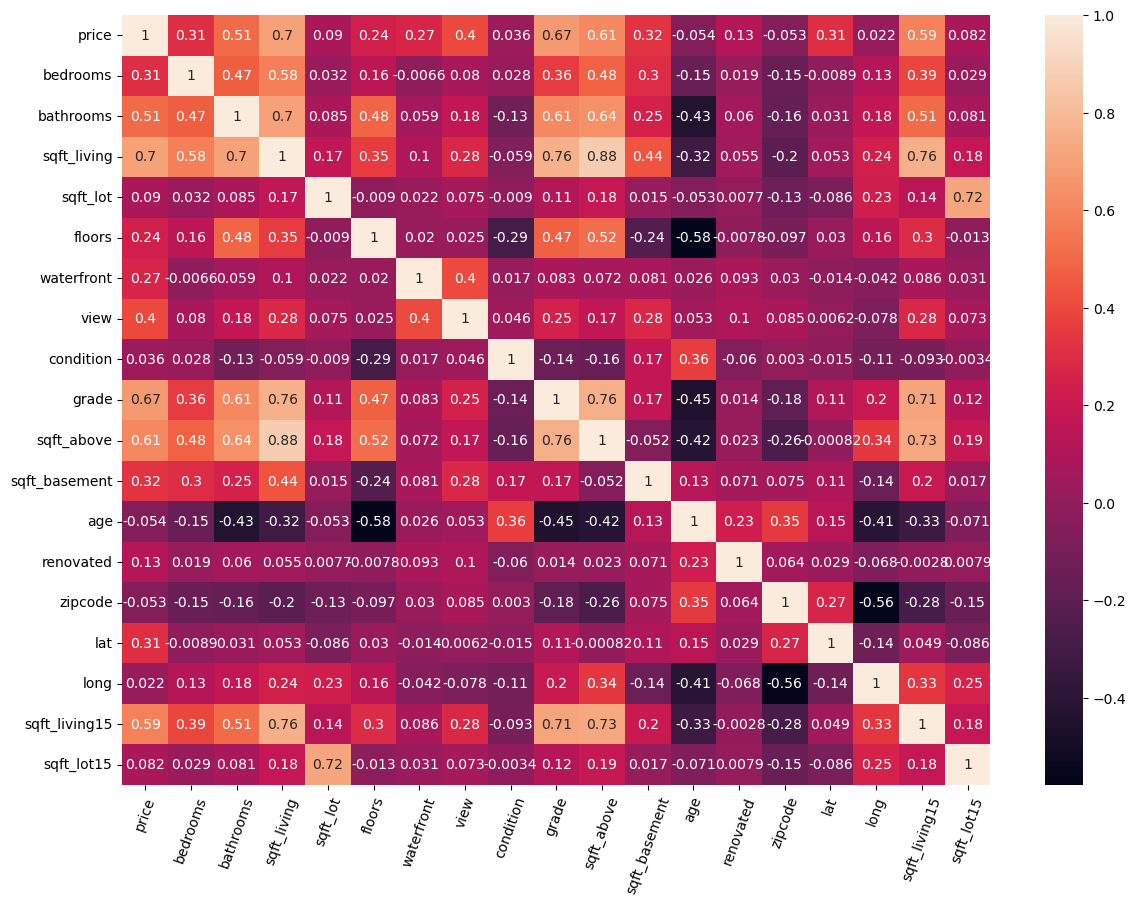

In [58]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(),annot=True)
plt.xticks(rotation=70)
plt.show()

#### Visualizing the coorelation with price

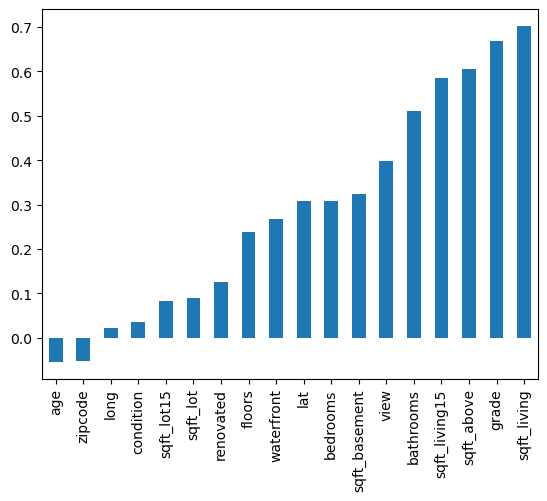

In [59]:
df.corr()['price'][1:].sort_values().plot(kind='bar')
plt.show()

#### Visualizing the data

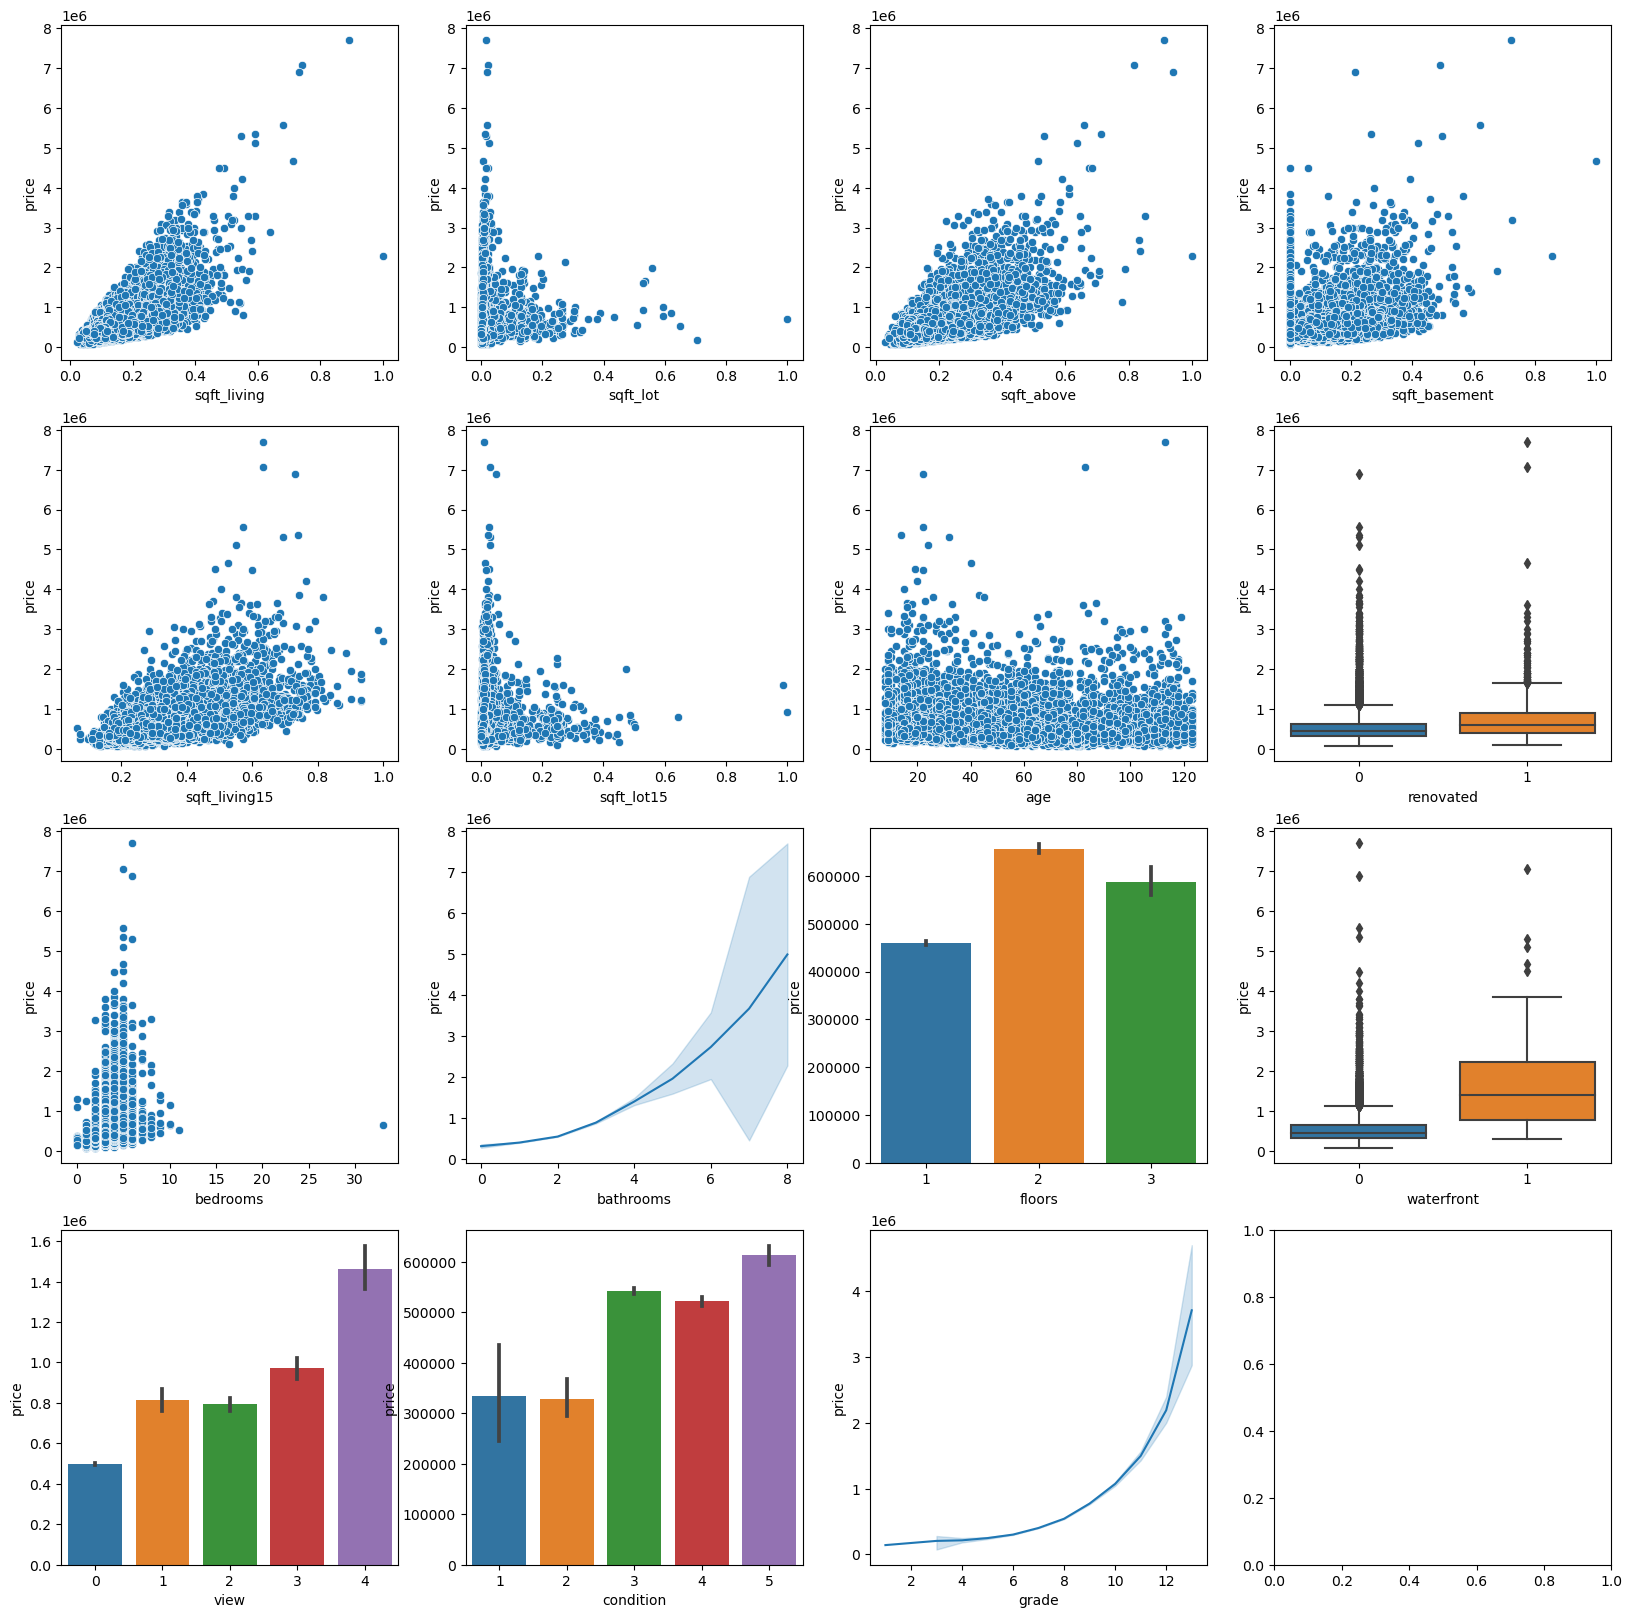

In [60]:
# visualizing the relation between price and features
fig, ax = plt.subplots(4,4,figsize=(20,20))
sns.scatterplot( x = df['sqft_living'], y = df['price'],ax=ax[0,0])
sns.scatterplot( x = df['sqft_lot'], y = df['price'],ax=ax[0,1])
sns.scatterplot( x = df['sqft_above'], y = df['price'],ax=ax[0,2])
sns.scatterplot( x = df['sqft_basement'], y = df['price'],ax=ax[0,3])
sns.scatterplot( x = df['sqft_living15'], y = df['price'],ax=ax[1,0])
sns.scatterplot( x = df['sqft_lot15'], y = df['price'],ax=ax[1,1])
sns.scatterplot( x = df['age'], y = df['price'],ax=ax[1,2])
sns.boxplot( x = df['renovated'], y = df['price'],ax=ax[1,3])
sns.scatterplot( x = df['bedrooms'], y = df['price'],ax=ax[2,0])
sns.lineplot( x = df['bathrooms'], y = df['price'],ax=ax[2,1])
sns.barplot( x = df['floors'], y = df['price'],ax=ax[2,2])
sns.boxplot( x = df['waterfront'], y = df['price'],ax=ax[2,3])
sns.barplot( x = df['view'], y = df['price'],ax=ax[3,0])
sns.barplot( x = df['condition'], y = df['price'],ax=ax[3,1])
sns.lineplot( x = df['grade'], y = df['price'],ax=ax[3,2])
plt.show()

#### Plotting the location of the houses based on longitude and latitude on the map

In [61]:
map = folium.Map(location=[47.5480, -121.9836],zoom_start=8)
marker_cluster = FastMarkerCluster(data[['lat', 'long']].values.tolist()).add_to(map)
map

## Train/Test Split

In [64]:
X = df.drop('price',axis=1)
Y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

## Model Training

### Using pipeline to combine the transformers and estimators and fit the model

In [67]:
input = [('scale',StandardScaler()),('polynomial', PolynomialFeatures(degree=2)),('model',LinearRegression())]
pipe = Pipeline(input)

In [68]:
#training the model
pipe.fit(X_train,y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures()),
                ('model', LinearRegression())])

In [75]:
#testing the model
pipe_pred = pipe.predict(X_test)
print(f'Accuracy: {r2_score(y_test,pipe_pred)*100:.2f}')

Accuracy: 82.72


### Ridge Regression

In [77]:
Ridgemodel = Ridge(alpha = 0.001)

In [78]:
# training the model
Ridgemodel.fit(X_train,y_train)

Ridge(alpha=0.001)

In [79]:
#testing the model
r_pred = Ridgemodel.predict(X_test)
print(f'Accuracy: {r2_score(y_test,r_pred)*100:.2f}')

Accuracy: 71.23


### Random Forest Regression

In [82]:
regressor = RandomForestRegressor(n_estimators=100, random_state=0)

In [83]:
# training the model
regressor.fit(X_train,y_train)

RandomForestRegressor(random_state=0)

In [84]:
#testing the model
regre = regressor.predict(X_test)
print(f'Accuracy: {r2_score(y_test,regre)*100:.2f}')

Accuracy: 87.90


## Model Evalution

### Distribution plot from the models predictions and the actual values

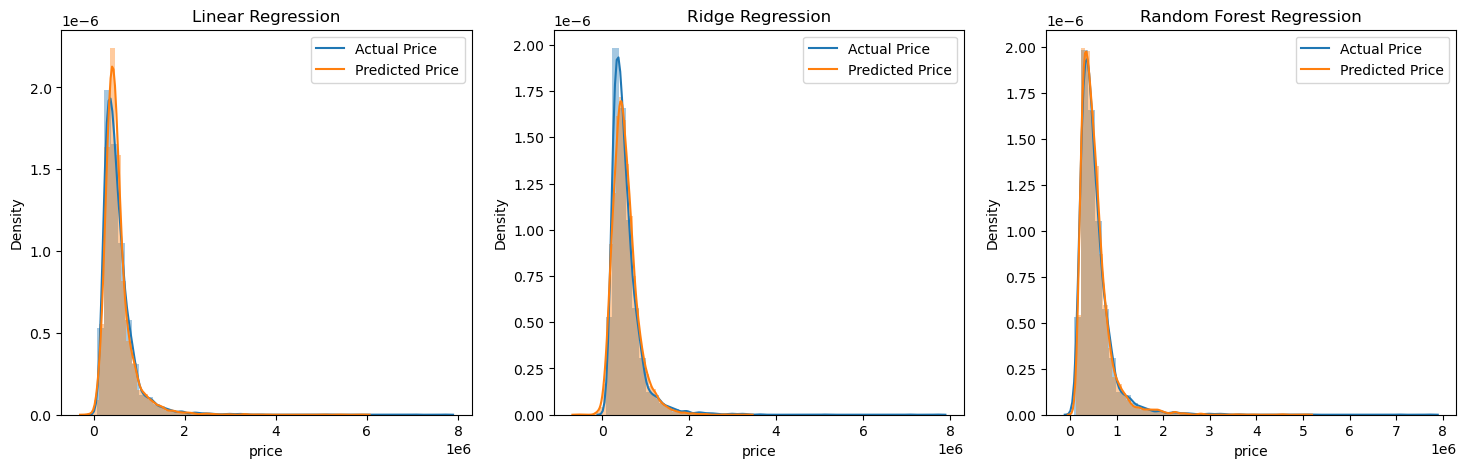

In [90]:
# displot of the actual price and predicted price for all models
fig, ax = plt.subplots(1,3,figsize=(18,5))
sns.distplot(y_test,ax=ax[0])
sns.distplot(pipe_pred,ax=ax[0])
sns.distplot(y_test,ax=ax[1])
sns.distplot(r_pred,ax=ax[1])
sns.distplot(y_test,ax=ax[2])
sns.distplot(regre,ax=ax[2])
# legends
ax[0].legend(['Actual Price','Predicted Price'])
ax[1].legend(['Actual Price','Predicted Price'])
ax[2].legend(['Actual Price','Predicted Price'])
#model name as title
ax[0].set_title('Linear Regression')
ax[1].set_title('Ridge Regression')
ax[2].set_title('Random Forest Regression')
plt.show()

### Error Evaluation

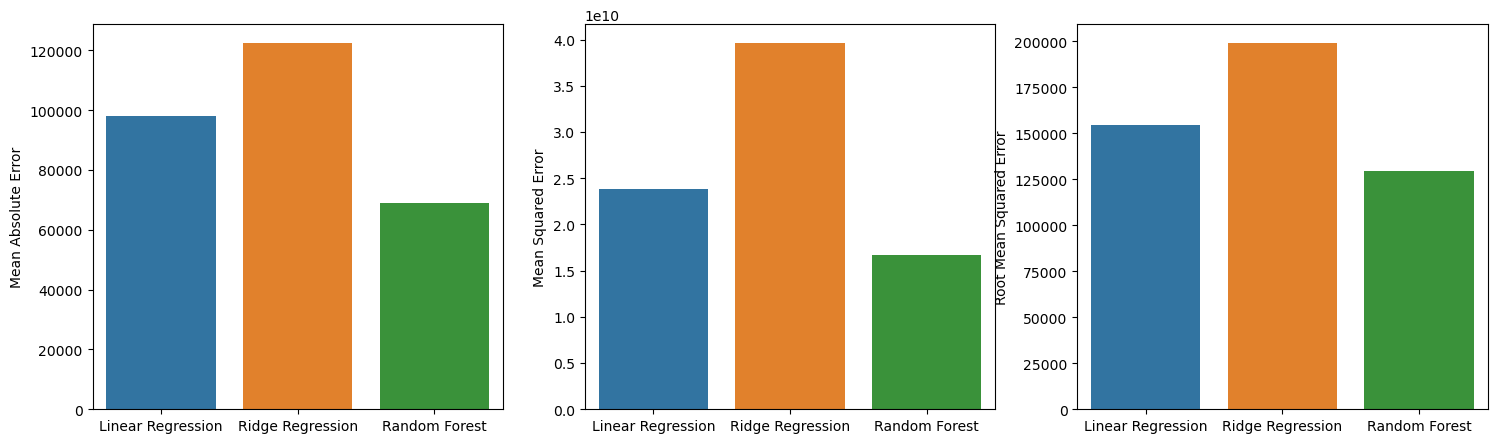

In [89]:
#plot the graph to compare mae, mse, rmse for all models
fig, ax = plt.subplots(1,3,figsize=(18,5))
sns.barplot(x=['Linear Regression','Ridge Regression','Random Forest'],y=[mean_absolute_error(y_test,pipe_pred),mean_absolute_error(y_test,r_pred),mean_absolute_error(y_test,regre)],ax=ax[0])
sns.barplot(x=['Linear Regression','Ridge Regression','Random Forest'],y=[mean_squared_error(y_test,pipe_pred),mean_squared_error(y_test,r_pred),mean_squared_error(y_test,regre)],ax=ax[1])
sns.barplot(x=['Linear Regression','Ridge Regression','Random Forest'],y=[np.sqrt(mean_squared_error(y_test,pipe_pred)),np.sqrt(mean_squared_error(y_test,r_pred)),np.sqrt(mean_squared_error(y_test,regre))],ax=ax[2])
# label for the graph
ax[0].set_ylabel('Mean Absolute Error')
ax[1].set_ylabel('Mean Squared Error')
ax[2].set_ylabel('Root Mean Squared Error')
plt.show()

### Model Comparison

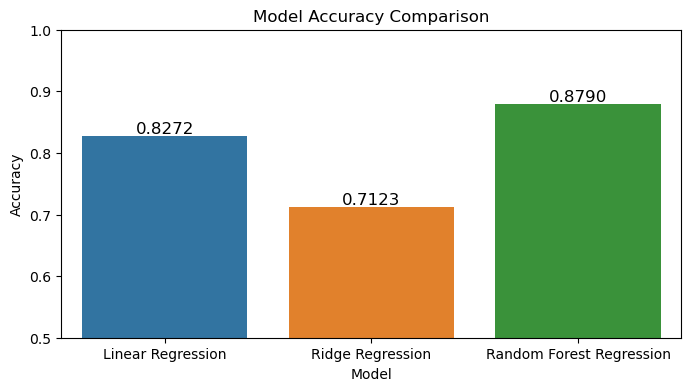

In [95]:
models = ['Linear Regression','Ridge Regression','Random Forest Regression']
accuracy = [metrics.r2_score(y_test,pipe_pred),metrics.r2_score(y_test,r_pred),metrics.r2_score(y_test,regre)]
plt.figure(figsize=(8,4))
sns.barplot(x=models, y=accuracy)

for i, val in enumerate(accuracy):
    plt.text(i, val, f'{val:.4f}', ha='center', va='bottom', fontsize=12)
    
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0.5, 1.0)
plt.show()

## Conclusion

From the analysis, we can see that the Random Forest Regression model performed better than the Ridge Regression model and Polynomial Regression model.

During the EDA process, we found out that the location of the house is a very important factor in determining the price of the house, since houese with similar area and other features can have different prices depending on the location of the house.

The location of the houses has been plotted on the map using the longitude and latitude values which makesrole of location in determining the price of the house more clear.

## Building a Predictive System

In [100]:
def prediction (data):
    input_data_as_numpy_array= np.asarray(data)

    input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

    prediction = regressor.predict(input_data_reshaped)
    
    print(f'The price of the house is ${prediction[0]:.2f}')

In [101]:
input_data = (3,2,2000,10000,2,0,0,3,8,2000,0,1990,0,98001,47.5480,121.9836,2000,1000)
prediction(input_data)

The price of the house is $1078694.05


In [108]:
input_data = (4,3.00,1960,5000,1.00,0,0,5,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000)
prediction(input_data)

The price of the house is $848461.88
